# RESEARCH NOTEBOOK --> SUPERTREND

In [5]:
from hummingbot.data_feed.candles_feed.candles_factory import CandlesConfig
import asyncio
from utils.hummingbot_processes import aget_candles_list

exchange = "binance_perpetual"
symbols = ["MATIC-USDT"]
intervals = ["1m"]
max_records = 10080

candles_config = [CandlesConfig(connector=exchange,
                                trading_pair=symbol,
                                interval=interval,
                                max_records=max_records) for symbol in symbols for interval in intervals]

all_candles = await aget_candles_list(candles_config)

100%|██████████| 10080/10080 [00:09<00:00, 1117.51it/s]
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x105575ff0>
Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x13bce6860>, 28635.105190041)]']
connector: <aiohttp.connector.TCPConnector object at 0x13a4acb50>


In [2]:
import pandas as pd

def analyze_candle_ranges(df, window_length):
    # List to store range data
    range_data = []

    # Loop through the DataFrame based on the window length
    for start_idx in range(len(df) - window_length + 1):
        # Define the window
        end_idx = start_idx + window_length
        window = df[start_idx:end_idx]

        # Find the max and min values within the window
        max_price = window['high'].max()
        min_price = window['low'].min()

        # Calculate the range
        price_range = max_price - min_price
        price_range_pct = price_range / min_price

        # Store the data
        range_data.append((start_idx, start_idx + window_length, max_price, min_price, price_range, price_range_pct))

    # Create a DataFrame from the range data
    columns = ['Start_Index', 'End_Index', 'Max_Price', 'Min_Price', 'Price_Range', 'Price_Range_Pct']
    ranges_df = pd.DataFrame(range_data, columns=columns)

    return ranges_df

# To use the function:
# Assuming 'df' is your DataFrame with 'high' and 'low' price columns


In [11]:
window_length = 240  # Replace with your desired

range_analysis_df = analyze_candle_ranges(all_candles[0], window_length)

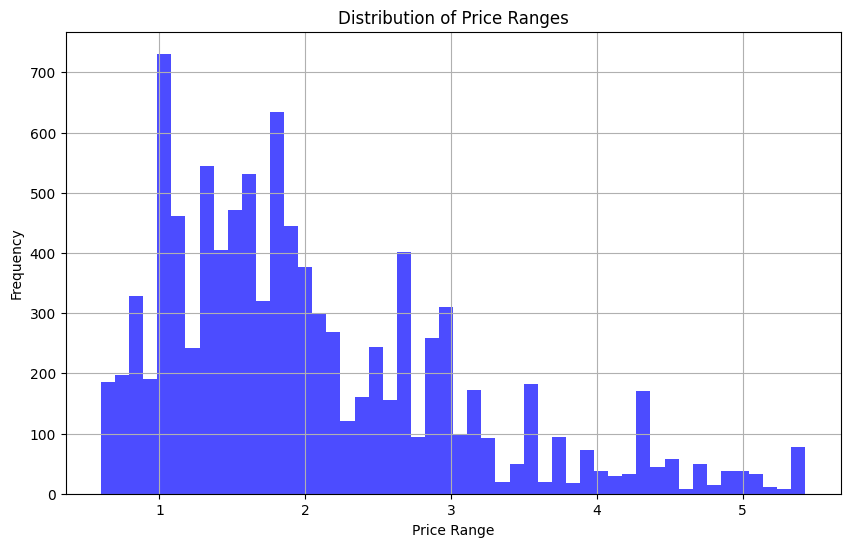

In [12]:
import matplotlib.pyplot as plt

# Assuming range_analysis_df is your DataFrame from the previous function and has a 'Price_Range' column
plt.figure(figsize=(10, 6))
plt.hist(range_analysis_df['Price_Range_Pct'] * 100, bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


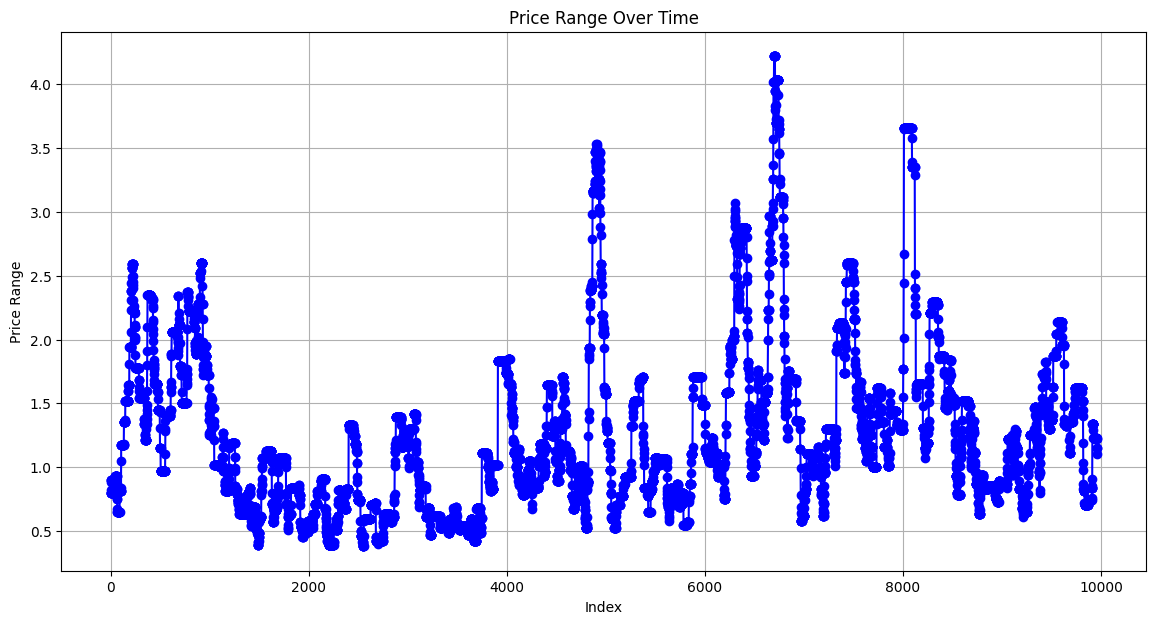

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(range_analysis_df['Start_Index'], range_analysis_df['Price_Range'] * 100, marker='o', linestyle='-', color='blue')
plt.title('Price Range Over Time')
plt.xlabel('Index')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()
